# Analisis de las ventas sobre videojuegos y plataformas 

Cargamos las librerías necesarias, el dataset y vemos como están estructurados los datos 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is BE20-3201

 Directory of C:\Desarrollo\repos\Master-BigData-CIFF-2016\entornos-DS-python\VideoGame analysis

01/11/2016  19:11    <DIR>          .
01/11/2016  19:11    <DIR>          ..
01/11/2016  19:11    <DIR>          .ipynb_checkpoints
30/10/2016  17:18           141.230 VideoGame Analysis.ipynb
30/10/2016  16:38         1.355.781 videoGameSales.csv
               2 File(s)      1.497.011 bytes
               3 Dir(s)  36.277.022.720 bytes free


In [4]:
data = pd.read_csv('videoGameSales.csv')

In [5]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Revisamos si hay nulos dentro del dataset, y obtenemos las métricas del mismo 

In [6]:
#data.isnull().values.any()
data.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [7]:
len(data)

16598

In [8]:
df = data.dropna()
len(df)

16291

Se eliminan unos 400 registros por contener datos nulos en ciertos campos. 

In [9]:
len(df['Publisher'].unique())

576

In [47]:
len(df['Platform'].unique())

31

In [19]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [146]:
df['Global_Sales'].max()
df['JP_Sales'].max()

10.220000000000001

## Analizamos el numero de registros por plataforma que disponemos en el dataset

Vemos que tenemos bastante mas registros acerca de las plataformas de DS y PS2 que de el resto, con lo que puede influir en los resultados que obtendremos a continuacion, ya que analizaremos los distitnos tipos de ventas de estas plataformas mediante la suma anual de las ventas.

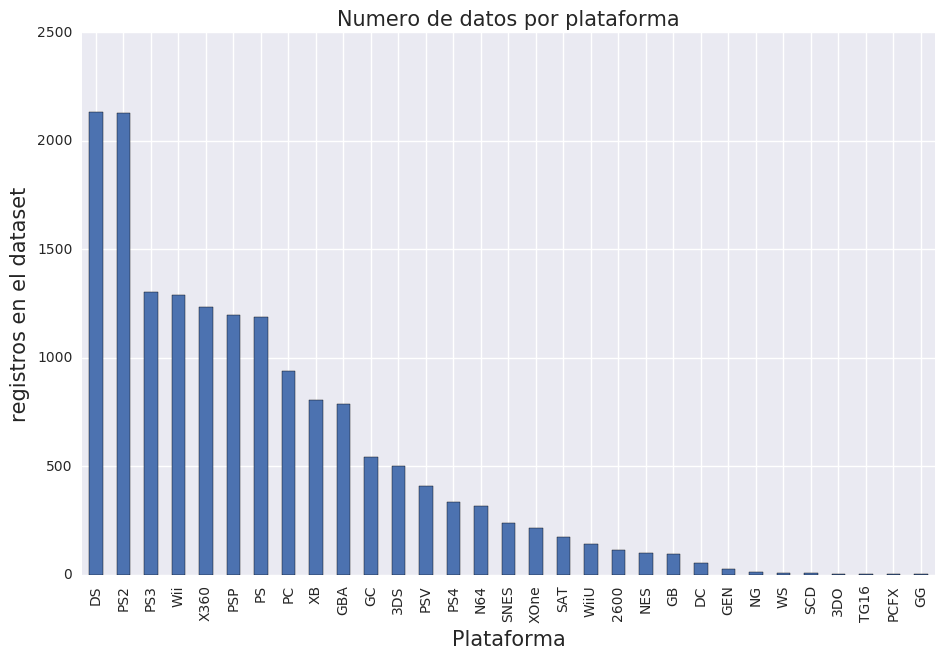

In [102]:
# Number of Wii 
fig,ax = plt.subplots(figsize=(11,7))
df['Platform'].value_counts().plot(kind='bar')
plt.title('Numero de datos por plataforma',fontsize=15)
plt.xlabel('Plataforma',fontsize=15)
plt.ylabel('registros en el dataset',fontsize=15)

## Analizamos tanto las ventas por tipo de genero, como por plataforma (obteniendo el top 10) y la progresion en el tiempo de las ventas

### Ventas globales por tipo de plataforma ordenadas de mayor a menor

Esta claro analizando las vengtas globales por platforma, que PS2 es la que mas ventas a tenido a lo largo de los años. Posteriorimente analizaremos las ventas por año

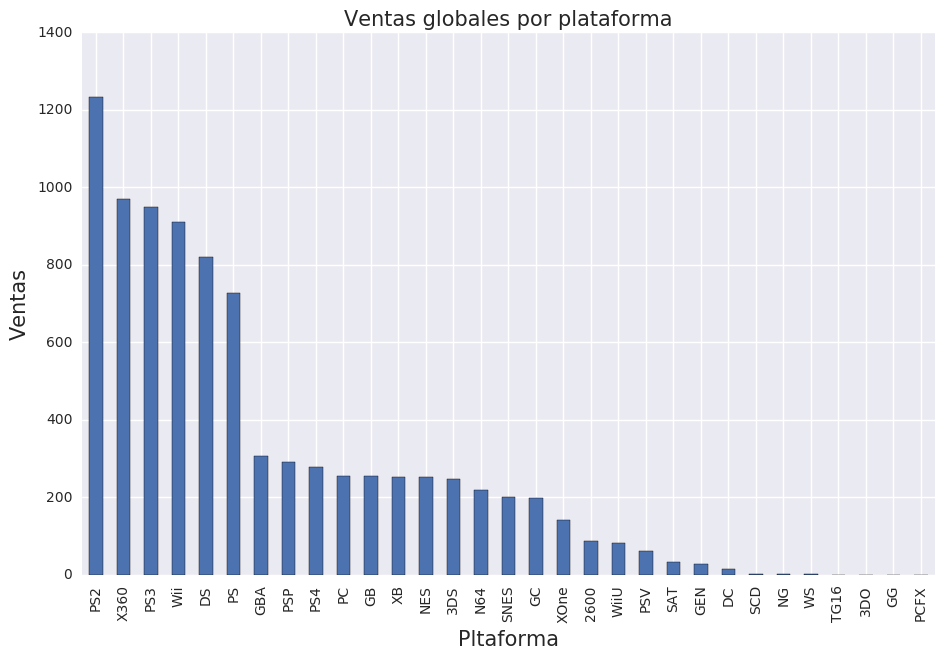

In [100]:
fig,ax = plt.subplots(figsize=(11,7))
df.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas globales por plataforma',fontsize=15)
plt.xlabel('Pltaforma',fontsize=15)
plt.ylabel('Ventas',fontsize=15)

### Analizamos el top 10 de los vendedores

Analizando los top10 de los vendedores, vemos que el primero supera en 5 veces las ventas del segundo competidor a lo largo de la serie historica de la que se tienen datos. (entre 1980 y 2016)

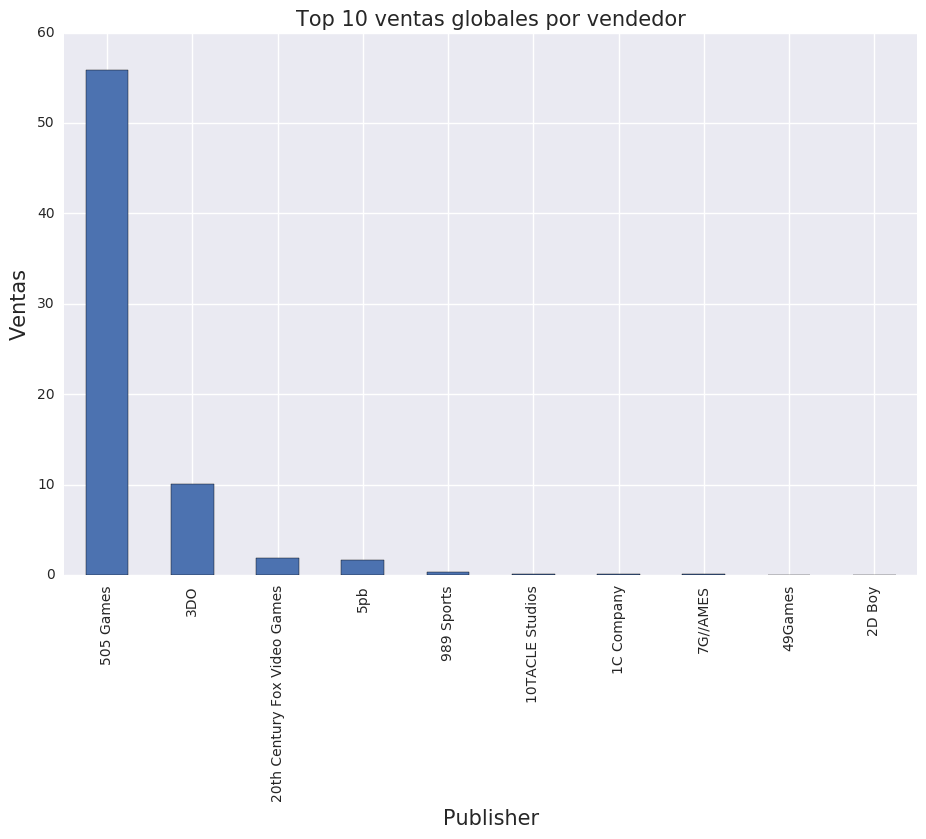

In [84]:
fig,ax = plt.subplots(figsize=(11,7))
plt.title('Top 10 ventas globales por vendedor',fontsize=15)
plt.xlabel('Vendedor',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
df.groupby('Publisher').sum().head(10)['Global_Sales'].sort_values(ascending=False).plot(kind='bar')

### Analizamos las vetas por género

Dentro de los géneros mas vendidos vemos que los de Accion y deportes, se llevan la palma

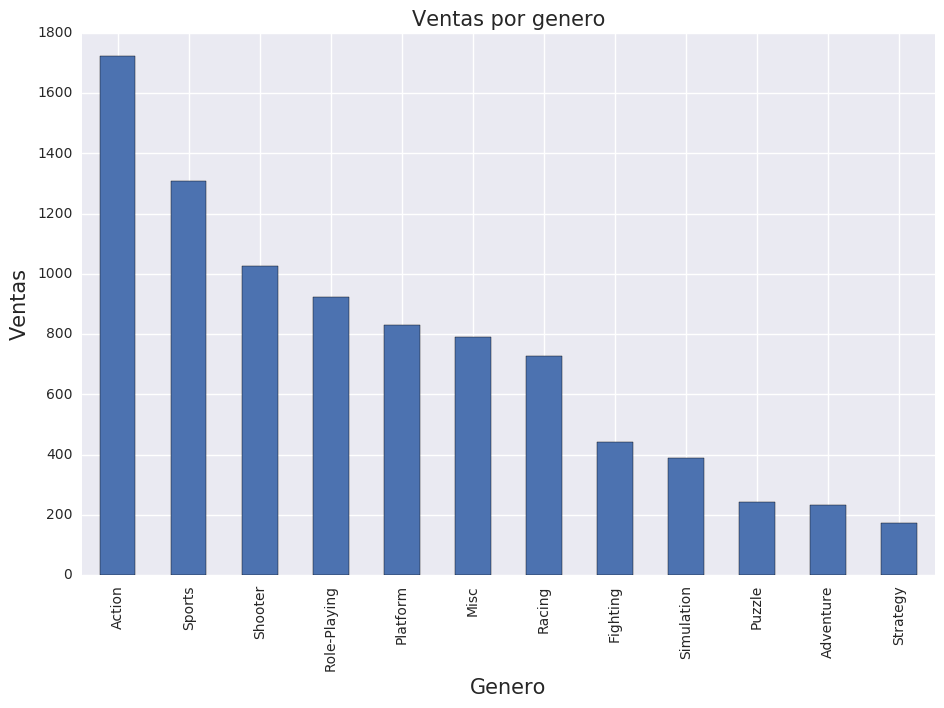

In [91]:
fig,ax = plt.subplots(figsize=(11,7))
df.groupby('Genre').sum()['Global_Sales'].sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas por genero',fontsize=15)
plt.xlabel('Genero',fontsize=15)
plt.ylabel('Ventas',fontsize=15)

### Analizamos la evolucion temporal de las ventas

El siguiente gráfico es el interesante,porque muestra el aó álgido de las ventas de juegos y videoconsolas dentro del mercado y su posterior declive, el cual coincide con una época de recesión economica mundial.
Es claro que entre 1995 y 2008 has sido los años álgidos para las consolas y ventas de videojuegos.

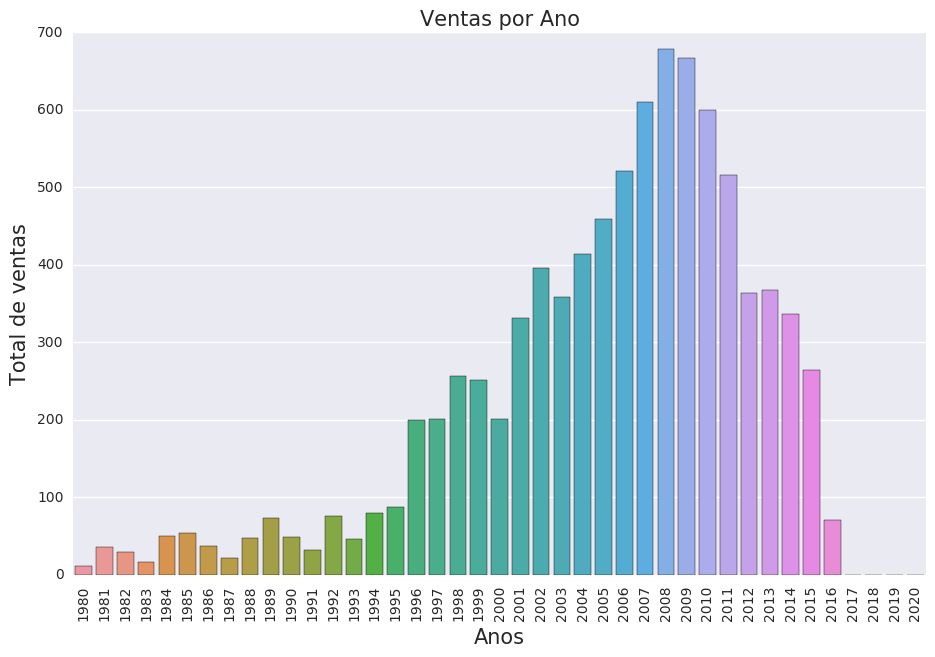

In [95]:
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year)
year_sale = []
year_list = []
for year in year_range:
    year_sale.append(df[df['Year'] == year].dropna()['Global_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(11,7))
sns.barplot(x = year_list,y = year_sale,ax=ax)
plt.title('Ventas por Ano',fontsize=15 )
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)
plt.ylabel('Total de ventas',fontsize=15)
plt.xlabel('Anos',fontsize=15)

Otra manera gráfica de ver la evolucion temporal de las ventas de videojuegos (basandonos en los datos de ventas globales)

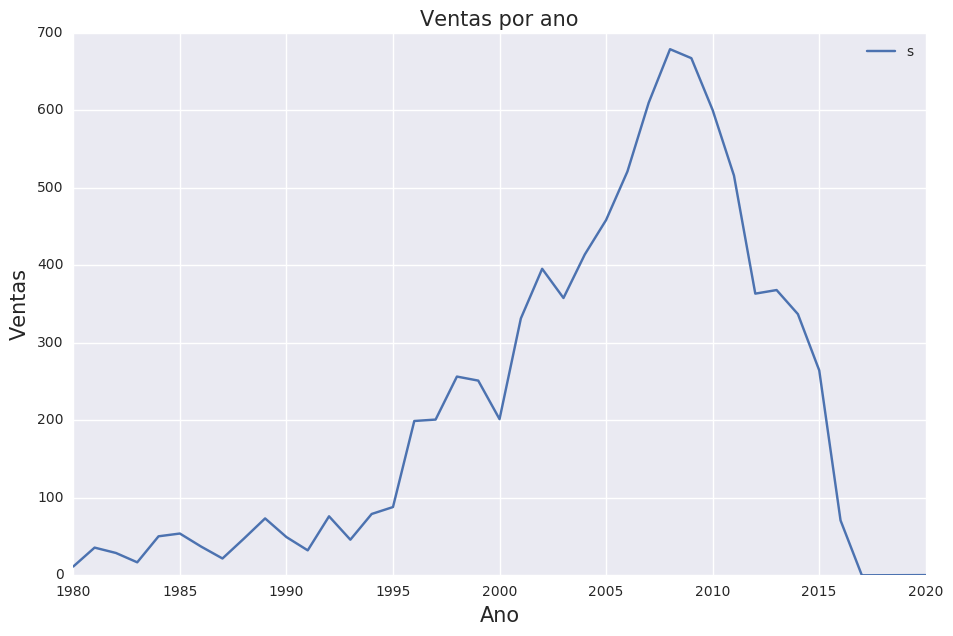

In [97]:
fig,ax = plt.subplots(figsize=(11,7))
df.groupby(['Year'])['Global_Sales'].sum().plot(label='sales')
plt.legend('sales', loc='best')
plt.title('Ventas por ano',fontsize=15)
plt.xlabel('Ano',fontsize=15)
plt.ylabel('Ventas',fontsize=15)

Vamos a ver la comparativa temporal de las top 5 plataformas de ventas en mercado. Para eso obtenermos aquellas plataformas que agrupadas sus ventas globales por años sean las mas elevadas.

A posteriori, filtramos el dataset con estas top5 plataformas viendo el comportamiento temporal de sus ventas. 

Vemos que el rango temporal de las compañias en el top de ventas es muy distinto. Así la Wii copo el mercado entre los años 2000 y 2006, donde dio el relevo a la wii


In [107]:
data = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending = False).head(5)
data

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
Name: Global_Sales, dtype: float64

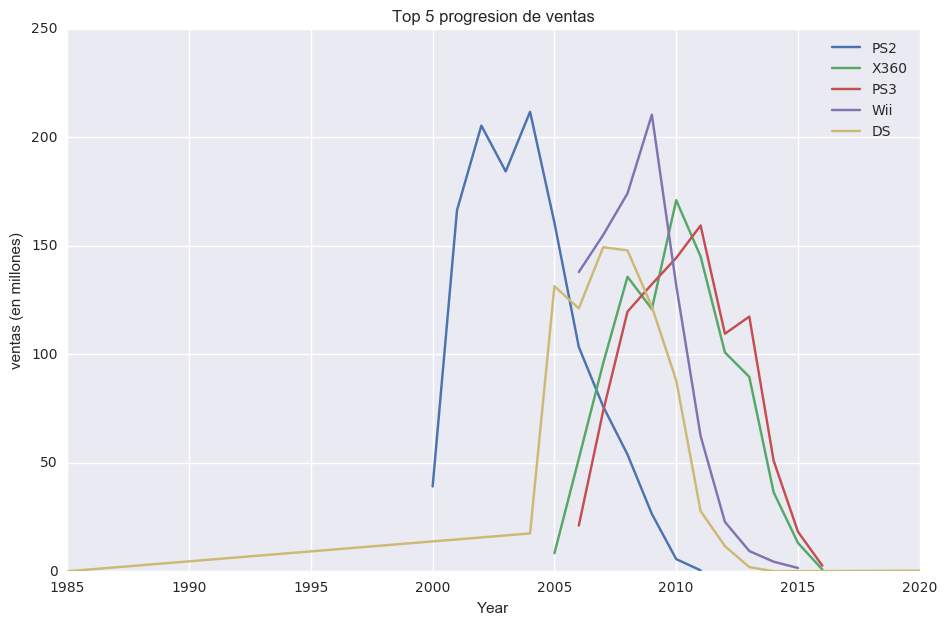

In [132]:
plats = ['PS2','X360','PS3','Wii','DS']
fig,ax = plt.subplots(figsize=(11,7))
ax.set_title("Top 5 progresion de ventas")
ax.set_ylabel("ventas (en millones)")
for firm in plats:
    df[df['Platform']==firm].groupby(['Year'])['Global_Sales'].sum().plot()
    plt.legend(plats, loc='best')

Es curioso algunas conclusiones al respecto:
- Que haya datos de 2020 seguramente quiera decir que estando en 2016 haya datos que sean incorrectos. 
- Se ve como no existen datos anteriores a ciertos años para algunas de las plataformas
- Llama la atencion el declibe a partir de 2010 de todas las plataformas, pero es extraño que lleguen a niveles de 0 en 2015. Deberian mantenerse en un nivel de ventas al menos mínimo